# Спринт 2. Исследовательский анализ данных

## Постановка задачи:

1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

## Шаг 1. Загружаем dataframe

##### Импортируем датасет с помощью pandas

In [1]:
import pandas as pd #Подключаем pandas
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pth1 = 'datasets/real_estate_data.csv'
pth2 = 'https://code.s3.yandex.net/datasets/real_estate_data.csv' 

try:

    data = pd.read_csv(pth1, sep='\t')

except OSError as e:
    
    data = pd.read_csv(pth2, sep='\t') 

##### Изучаем общую информацию о полученном файле**

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание столбцов:**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

##### Видимые проблемы:

Очевидно, что в столбцах ceiling_height, floors_total, is_apartment, living_area, kitchen_area, balcony, locality_name, airports_nearest,  cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition есть пропущенные значения

Так же столбцы is_apartment и floors_total явно имеют неправильный тип (должен быть bool и int). Дата публикации записана в виде строки, что может быть не удобно

##### Построим общую гистограмму для всех столбцов

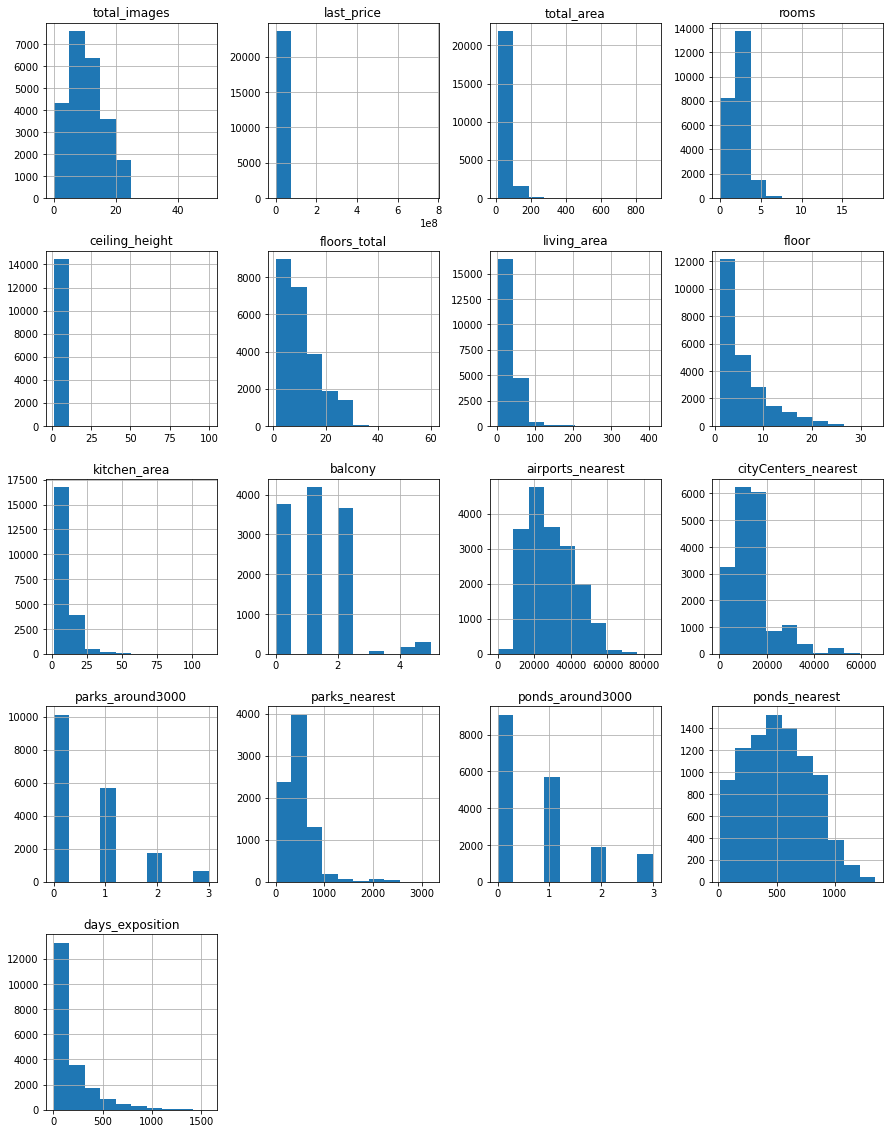

In [5]:
data.hist(figsize= (15, 20));

## Шаг 2. Предобработка данных

### 2.1. Заполнение NaN

прежде чем что-то делать переименуем столбец cityCenters_nearest в snake_case

In [6]:
data = data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest'})

В рамках предыдущего этапа мы определили предполагаемые столбцы с пропусками. Теперь проверим наше предположение

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

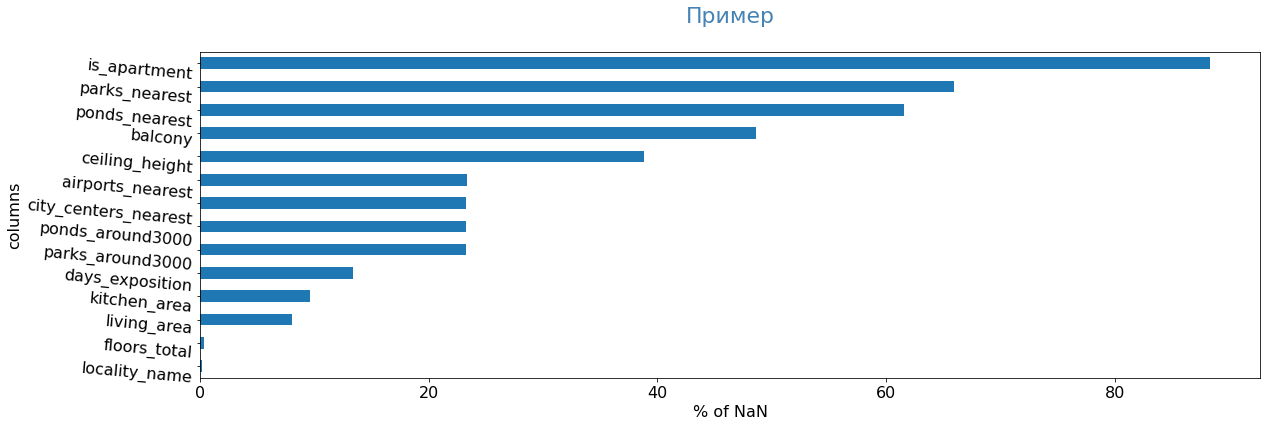

In [8]:
bar_plot = pass_value_barh(data)
plt.xlabel('% of NaN', fontsize = 16)
plt.ylabel('columns', fontsize = 16)
plt.show()

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### 2.1.1 Заполнение столбцов kitchen_area, living_area

В студиях нет кухни. Для студий можем заполнить NaN нулями. За студии (комнаты) будем считать также 

In [10]:
data.loc[((data['studio'] == True) | (data['rooms'] == 0))& (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [11]:
data.kitchen_area.isna().sum()

2070

208 студий или комнат убрали

Вероятно, что если жилплощадь и площадь кухни превышает 0,9 от суммарной площади, здесь явно есть ошибка. 
Так как для заполнения пропусков далее нам потребуются медианные значения, посмотрим количество таких ошибок

In [12]:
data[(data['living_area'] + data['kitchen_area']) > (0.9*data['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,NaN,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,NaN,...,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,NaN,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,NaN,...,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,NaN,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,NaN,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,NaN,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


469 значений !

Скорее всего жилплощадь получена вычитанием кухни из суммарной площади. Это не правильно, так как жилая площадь- это суммарная площадь только комнат (без корридоров и т.д)

Очевидно, что столбец living_area заполнен некорректно 

In [13]:
def corr_living_area(data:pd.DataFrame) -> pd.DataFrame:
    i = 0
    while i < len(data['living_area']):
        if (data.loc[i,'living_area'] + data.loc[i,'kitchen_area']) > (0.89 * data.loc[i,'total_area']):                     
                data.loc[i,'living_area'] = 0.89*data.loc[i,'total_area'] - data.loc[i,'kitchen_area']  
        i += 1
    return data   

In [14]:
corr_living_area(data);

In [15]:
data[(data['living_area'] + data['kitchen_area']) > (0.9 * data['total_area'])]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
area_median = data.pivot_table(index= 'total_area', values= ['kitchen_area', 'living_area'] , aggfunc='median') 

Остальные значения заполним медианными для суммарной площади. Для таких строчек значения жилой площади так же придется расчитывать вне зависимости от значения

In [17]:
def median_area(data:pd.DataFrame, area_median:pd.DataFrame, column1:str, column2:str, column3:str) -> pd.DataFrame:         
    i = 0
    while i < len(data[column3]):
        if mt.isnan(data.loc[i, column3]) == True:                
                data.loc[i, column3] = (area_median.loc[area_median.index == data.loc[30, column1] 
                                                                       ,column2].tolist()[0])
                
                data.loc[i, column2] = (0.85*data.loc[i ,column1] - data.loc[i ,column3])
        i += 1
    return data

In [18]:
data = median_area(data, area_median, 'total_area', 'living_area', 'kitchen_area')

In [19]:
data.kitchen_area.isna().sum()

0

Аналогично заполним оставшиеся пропуски в living_area

In [20]:
data = median_area(data, area_median, 'total_area', 'kitchen_area', 'living_area')

In [21]:
data.living_area.isna().sum()

0

Проверим количетво аномалий

In [22]:
data[(data['living_area'] + data['kitchen_area']) > (0.9 * data['total_area'])]  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### 2.1.2 Столбцы locality_name и balcony

В столбце локаций всего 49 пропусков. По сравнению с общим количеством этим можно принебречь

In [23]:


data= data.dropna(subset= ['locality_name']).reset_index(drop= True)

Так же если не указано количество балконов, скорее всего их нет

In [24]:
data['balcony'] = data['balcony'].fillna(0)

In [25]:
data.balcony.isna().sum()

0

#### 2.1.3 Столбец floors

Проверим гипотезу, что если этаж не указан, значит в здании всего один этаж

In [26]:
data[data['floor'] != 1].floor.isna().sum()

0

Гипотеза не подтвердилась. В столбце количества этажей всего 86 пропусков. По сравнению с общим количеством этим можно принебречь

In [27]:
data = data.dropna(subset = ['floors_total']).reset_index(drop = True)
data['floors_total'].isna().sum()

0

####  2.1.4 Cтолбец is_appartament

***Гипотеза:*** Скорее всего пропуски в столбце is_apartament означают, что объект недвижимости не является апартаментами.

Для проверки данной гипотезы логично предположить, что практически все апартаменты находятся в Санкт-Петербурге.  
Для всех населенных пунктов кроме Спб сравним количество пропущенных значений в столбце is_appartament и количество записей об объявлениях

In [28]:
not_in_spb = data.query('locality_name != "Санкт-Петербург"').is_apartment

print('Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб:',
      not_in_spb.isna().sum(),',', len(not_in_spb))     

Количество пропусков в столбце is_apartament вне спб, Количество записей о недвижимости вне спб: 6987 , 7914


In [29]:
data.query('locality_name != "Санкт-Петербург"').is_apartment.count()

927

Всего 927 записей о статусе апартамены/не апартаменты в Ленинградской области !

Для того чтобы точно убедиться, среди данных записей посмотрим количество аппартаментов

In [30]:
not_in_spb = data.query('is_apartment == True' and 'is_apartment.isna() != True' and 'locality_name != "Санкт-Петербург"')
print('Количество аппартаменов в Лен.области:',not_in_spb.is_apartment.sum())

Количество аппартаменов в Лен.области: 11


Всего 11 аппартаментов по всей Ленинградской области. Из этого можно делать вывод, что если в столбце is_appartment стоит NAN, скорее всего объект недвижимости не является аппартаментами. Заполним пропуски значениями False

In [31]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.is_apartment.isna().sum()

0

#### 2.1.5. Столбцы parks_around3000 и ponds_around3000

Если есть расстояние до парков и водоёмов, логично предположить что по близости есть хотябы один парк. Поэтому заполним все строчки где есть расстояние до парка и водоема единицами.

In [32]:
data[(data['parks_nearest'].isna() != True) & (data['parks_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [33]:
data[(data['ponds_nearest'].isna() != True) & (data['ponds_around3000'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Для всех столбцов где есть расстояние до парка и водоема, количество парков и водоемов уже заполнено.  
Можно предположить, что если парки или водоемы не указаны, их по близости нет

In [34]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Вывод: Гипотеза верна. С данным столбцом мы ничего не сделаем**

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### 2.1.7 Столбец ceiling_height

Высоту потолков расчитаем медианное значение по категориям цены и местоположения.  
Для этого категоризируем стоимость квартир.

In [36]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [37]:
for i in range(len(data)):
    if data.loc[i, 'last_price'] < 3e+06:
        data.loc[i, 'last_price_category'] = 'E'
    elif 3e+06 <= data.loc[i, 'last_price'] <= 4e+06:
        data.loc[i, 'last_price_category'] = 'D'
    elif 4e+06 <= data.loc[i, 'last_price'] <= 5e+06:
        data.loc[i, 'last_price_category'] = 'C'
    elif 5e+06 <= data.loc[i, 'last_price'] <= 6.79e+06:
        data.loc[i, 'last_price_category'] = 'B'
    elif data.loc[i, 'last_price']  > 6.79e+06:
        data.loc[i, 'last_price_category'] = 'А' 
    else:
        print(data.loc[i, 'last_price'])
        assert(False)   

Заполним медианными значениями по городу и цене

In [38]:
for i in range(len(data['ceiling_height'])): 
    if mt.isnan(data.loc[i ,'ceiling_height']) == True :
        locality_name = data.loc[i ,"locality_name"]
        last_price_category = data.loc[i ,"last_price_category"]       
        data.loc[i ,'ceiling_height'] = data.query(('locality_name == @locality_name') and ('last_price_category ==@last_price_category')).ceiling_height.median()

In [39]:
data.ceiling_height.isna().sum()

0

#### 2.1.8 Столбец days_exposition

Скорее всего 3171 объявление имеет пропуски в столбце days_exposition, так как они были закрыты в первый день. Логично данные пропуски заполнить нулями

In [40]:
data['days_exposition'] = data['days_exposition'].fillna(0)

#### 2.1.9 Столбец city_centers_nearest

Заполним медианным для цены и города

Изучим распределение пропусков по городам

In [41]:
def count_nan_cities(data:pd.DataFrame) -> pd.DataFrame:
    unique_cities =  data['locality_name'].unique()
    output =  pd.DataFrame(columns= ['locality_name', 'NaN_count'])
    for index, city in enumerate(unique_cities): 
        output.loc[index, 'locality_name'] = city
        output.loc[index, 'NaN_count'] = data[data['locality_name'] == city].city_centers_nearest.isna().sum()  
    return output 

In [42]:
count_nan_cities(data)

,locality_name,NaN_count
0,Санкт-Петербург,60
1,посёлок Шушары,3
2,городской посёлок Янино-1,61
3,посёлок Парголово,0
4,посёлок Мурино,520
...,...,...
359,деревня Нижняя,1
360,коттеджный посёлок Лесное,1
361,деревня Тихковицы,1
362,деревня Борисова Грива,1


В лидерах спб и пригороды. Для Санкт-Петербурга расстояние до центра является ключевым показателем. Для остальных городов заполнять нет смысла. Так же очевидно, что при заполнении медианными значениями требуется ориентироваться 

In [43]:
for i in range(len(data['city_centers_nearest'])): 
    if (data.loc[i,'locality_name'] == 'Санкт-Петербург'):
        if mt.isnan(data.loc[i ,'city_centers_nearest']) == True:         
            last_price_category = data.loc[i ,"last_price_category"]
            data.loc[i ,'city_centers_nearest'] = data.query(('locality_name == Санкт-Петербург') and ('last_price_category ==@last_price_category')).city_centers_nearest.median()

In [44]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5441
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
last_price_category         0
dtype: int64

К сожалению, остальные столбцы мы не заполним

**Причина проблемы:** 

Пропуски данных связаны:

1. C человеческим фактором (пользователи не указывают определенные параметры)
2. C работой сайта, который воспринимает неуказанные параметры как NAN

### 2.2. Типы данных

Очевидно, что число этажей, количество балконов и количество дней с даты публикации не может быть дробным. Так же очевидно, что столбец is_apartment может принимать только 2 значения. Переведем данные столбцы в int и bool соответственно

In [45]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['rooms'] = data['rooms'].astype(int)

Значения даты публикации хранятся в строках. Лучше перевести их в DateTime

In [46]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'] , format='%Y-%m-%dT%H:%M:%S.%f')

Дробным не может быть так же кроличество парков и водоемов

In [47]:
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Посмотрим на результат

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Причина проблемы:**

Некорректные типы данных связаны с ошибками в ПО (ошибки в конвертации/сборе информации на сайте)

### 2.3. Обработка дубликатов

По сути на явные и неявные дубликаты можно проверить только по столбцу локации

In [49]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [50]:
data.locality_name.nunique()

364

In [51]:
def delete_settlements (row :str) -> str:
    settlements  = (['посёлок', 'поселок',  'городского', 'типа', 'городской', 'деревня',
     'станции', 'Пансионат', 'садовое', 'товарищество', 'село', 'коттеджный', 'садоводческое', 'некоммерческое', 'при', 'железнодорожной'])
    for settlement in settlements:
        if settlement in row:
            row = row.replace(settlement, '').strip() 
    return row

In [52]:
data.locality_name = data.locality_name.apply(delete_settlements).str.lower()

In [53]:
data.locality_name.nunique()

305

59 дубликатов убрали

In [54]:
data.locality_name.unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'фёдоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодёжное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

### 2.4. Обработка выбросов

Взглянем на данные

In [55]:
data.reset_index(drop=True)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18124.000000,23565.000000,8030.000000,23565.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.726331,10.675875,33.724304,5.878124,11.832415,0.593677,28797.082701,14180.599592,0.468831,490.580448,0.589900,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,0.994361,6.594823,23.343508,4.871485,10.502340,0.960660,12632.499735,8603.018574,0.748403,341.572956,0.883966,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,-7.300000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.000000,2.000000,7.200000,0.000000,18565.000000,9217.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,10.000000,0.000000,26757.000000,13094.000000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.000000,8.000000,13.700000,1.000000,37273.000000,16275.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,530.050000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### 2.4.1 Столбцы ceiling_height

2.50     3515
2.60     3283
2.55     2843
2.56     2283
2.90     2119
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

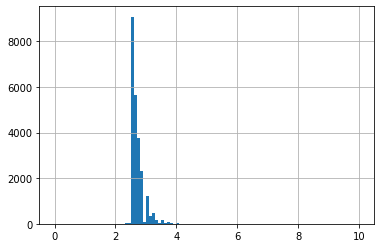

In [56]:
data['ceiling_height'].hist(bins=100, range=(0, 10));
data['ceiling_height'].value_counts()

Абсолютное большинство значений находится в диапазоне 2-4 метра, но минимальная высота потолков 1, а максимальная 100 м ? Здесь явно есть выбросы. Скорее всего здесь ошибка при вводе. Все что выше 10м будем делить на 10, предполагая что это ошибка записи десятичной дроби

In [57]:
def ceiling_height_division(cealing_hight: float) -> float:
        if cealing_hight > 10:
            cealing_hight =cealing_hight / 10
        return cealing_hight 
            
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_division)

Отбросим все потолки меньше 2м. Их всего 5 штук

In [58]:
data = data[data['ceiling_height'] > 2]
data.ceiling_height.describe()

count    23548.000000
mean         2.700278
std          0.250423
min          2.200000
25%          2.550000
50%          2.600000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23548 non-null  int64         
 1   last_price            23548 non-null  float64       
 2   total_area            23548 non-null  float64       
 3   first_day_exposition  23548 non-null  datetime64[ns]
 4   rooms                 23548 non-null  int64         
 5   ceiling_height        23548 non-null  float64       
 6   floors_total          23548 non-null  int64         
 7   living_area           23548 non-null  float64       
 8   floor                 23548 non-null  int64         
 9   is_apartment          23548 non-null  bool          
 10  studio                23548 non-null  bool          
 11  open_plan             23548 non-null  bool          
 12  kitchen_area          23548 non-null  float64       
 13  balcony         

#### 2.4.2 Столбец floors_total

Максимальный этаж 33, а всего этажей 60 ? Здесь явно выброс

30

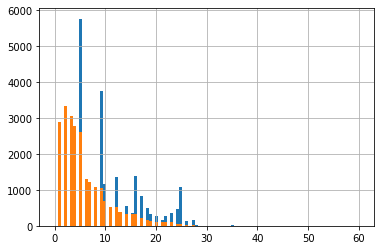

In [60]:
data['floors_total'].hist(bins=100, range=(0, 60));
data['floor'].hist(bins=100, range=(0, 60));
data[data['floors_total'] > 33].floors_total.count()

Всего 30 значений. Ими явно можно пренебречь

In [61]:
data = data[data['floors_total'] < 34]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23518 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23518 non-null  int64         
 1   last_price            23518 non-null  float64       
 2   total_area            23518 non-null  float64       
 3   first_day_exposition  23518 non-null  datetime64[ns]
 4   rooms                 23518 non-null  int64         
 5   ceiling_height        23518 non-null  float64       
 6   floors_total          23518 non-null  int64         
 7   living_area           23518 non-null  float64       
 8   floor                 23518 non-null  int64         
 9   is_apartment          23518 non-null  bool          
 10  studio                23518 non-null  bool          
 11  open_plan             23518 non-null  bool          
 12  kitchen_area          23518 non-null  float64       
 13  balcony         

#### 2.4.3 Столбцы kitchen_area и living_area

Жил площадь 0 - это явно выброс

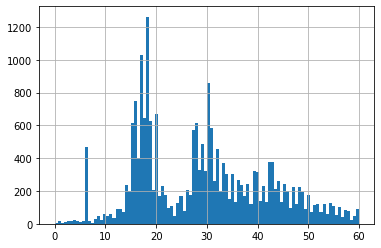

In [63]:
data['living_area'].hist(bins=100, range=(0, 60));

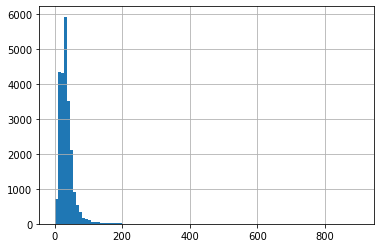

In [64]:
data['living_area'].hist(bins=100, range=(0, 900));

Уберем объявления меньше 9 квадрат и больше 00

In [65]:
data = data[(data['living_area'] > 9) & (data['living_area'] < 200)]
data.living_area.describe()

count    22737.000000
mean        34.172852
std         20.457744
min          9.020000
25%         18.600000
50%         30.000000
75%         42.200000
max        199.000000
Name: living_area, dtype: float64

Аналогично в kitchen_area

уберем значения >30 м2 и от 1 до 4 

105

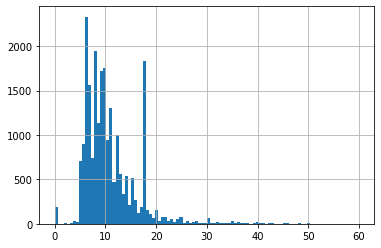

In [66]:
data['kitchen_area'].hist(bins=100, range=(0, 60));
data[data['kitchen_area'] > 40].kitchen_area.count()

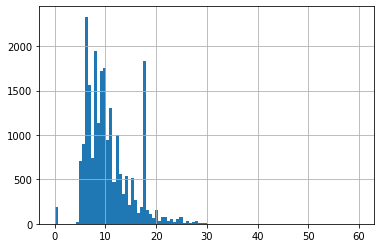

In [67]:
data = data[data['kitchen_area'] < 30]
data = data[(data['kitchen_area'] > 4) | (data['kitchen_area'] == 0)]
data['kitchen_area'].hist(bins=100, range=(0, 60));

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22345 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22345 non-null  int64         
 1   last_price            22345 non-null  float64       
 2   total_area            22345 non-null  float64       
 3   first_day_exposition  22345 non-null  datetime64[ns]
 4   rooms                 22345 non-null  int64         
 5   ceiling_height        22345 non-null  float64       
 6   floors_total          22345 non-null  int64         
 7   living_area           22345 non-null  float64       
 8   floor                 22345 non-null  int64         
 9   is_apartment          22345 non-null  bool          
 10  studio                22345 non-null  bool          
 11  open_plan             22345 non-null  bool          
 12  kitchen_area          22345 non-null  float64       
 13  balcony         

#### 2.4.4 Столбец days_exposition

Конечно возможно, что объявление висело 1580, но в основном столько они не висят

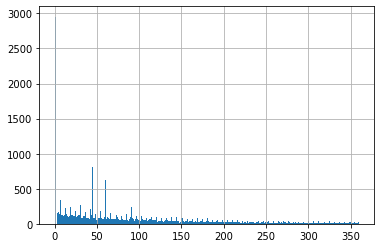

In [69]:
data['days_exposition'].hist(bins=300, range=(0, 360));

Ограничимся 2 годами

In [70]:
data[data['days_exposition'] > 1200].count()

total_images            85
last_price              85
total_area              85
first_day_exposition    85
rooms                   85
ceiling_height          85
floors_total            85
living_area             85
floor                   85
is_apartment            85
studio                  85
open_plan               85
kitchen_area            85
balcony                 85
locality_name           85
airports_nearest        74
city_centers_nearest    74
parks_around3000        85
parks_nearest           42
ponds_around3000        85
ponds_nearest           48
days_exposition         85
last_price_category     85
dtype: int64

In [71]:
data = data[data['days_exposition'] < 1200]

Так же очень врядли объекты недвижимости продавались за 1 день. Уберем значения меньше 5 дней

In [72]:
# check
data.shape[0]

22259

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  int64         
 1   last_price            22259 non-null  float64       
 2   total_area            22259 non-null  float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  int64         
 5   ceiling_height        22259 non-null  float64       
 6   floors_total          22259 non-null  int64         
 7   living_area           22259 non-null  float64       
 8   floor                 22259 non-null  int64         
 9   is_apartment          22259 non-null  bool          
 10  studio                22259 non-null  bool          
 11  open_plan             22259 non-null  bool          
 12  kitchen_area          22259 non-null  float64       
 13  balcony         

#### 2.4.5 Столбец last_price

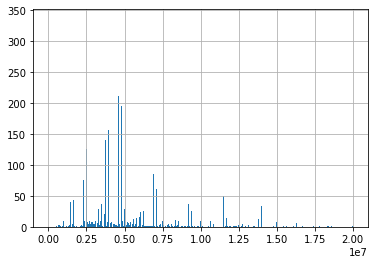

In [74]:
data['last_price'].hist(bins=3000, range=(0,0.2e+08 ));

Скорее всего цены меньше 1 млн являются выбросами

In [75]:
data = data[data['last_price']> 1e06]

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22032 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22032 non-null  int64         
 1   last_price            22032 non-null  float64       
 2   total_area            22032 non-null  float64       
 3   first_day_exposition  22032 non-null  datetime64[ns]
 4   rooms                 22032 non-null  int64         
 5   ceiling_height        22032 non-null  float64       
 6   floors_total          22032 non-null  int64         
 7   living_area           22032 non-null  float64       
 8   floor                 22032 non-null  int64         
 9   is_apartment          22032 non-null  bool          
 10  studio                22032 non-null  bool          
 11  open_plan             22032 non-null  bool          
 12  kitchen_area          22032 non-null  float64       
 13  balcony         

Аналогично можно утвержадать что цены выше 1 млн/м2 для такой выборки так же выбросы

In [77]:
data = data[data['last_price']/data['total_area'] < 1e06]

#### 2.4.6 Столбец rooms

Конечно бывают квартиры с 19-ю комнатами, но их количество несуществено. Уберем квартиры больше 7 комнат

In [78]:
 data = data[data['rooms'] < 8]

#### 2.4.7 Столбец total_area	

Посмотрим сколько квартир имеют площадь > 250 м2

In [79]:
data[data['total_area'] > 250].total_area.count()

31

Обрежем данный 'хвост'

In [80]:
data = data[data['total_area'] < 300]

#### 2.4.7 Столбец ceiling_height

Посмотрим сколько квартир имеют высоту потолков > 4.5 м

In [81]:
data[data['ceiling_height'] > 4.5].ceiling_height.count()

12

Обрежем данный 'хвост'

In [82]:
data = data[data['ceiling_height'] < 4.5]

In [83]:
# check
data.shape[0]

21985

Удалили 1714 значений (7.2 %)


В остальных столбцах видимых выбросов нет. Значения в пределах логически обоснованых. Сбросим индексы после обработки

In [84]:
data = data.reset_index(drop= True)

#### check gap

In [85]:

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")    
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,985.00","21,985.00","21,985.00","21,985.00","21,985.00","21,985.00","21,985.00","21,985.00","21,985.00"
min,0.00,15.50,2.20,0.00,"1,010,000.00",9.02,0.00,1.00,1.00
max,7.00,297.50,4.45,"1,199.00","245,000,000.00",195.85,29.90,32.00,33.00
median,2.00,52.00,2.60,74.00,"4,650,000.00",30.00,9.50,4.00,9.00


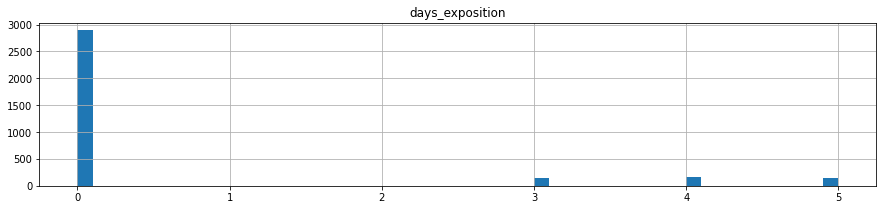

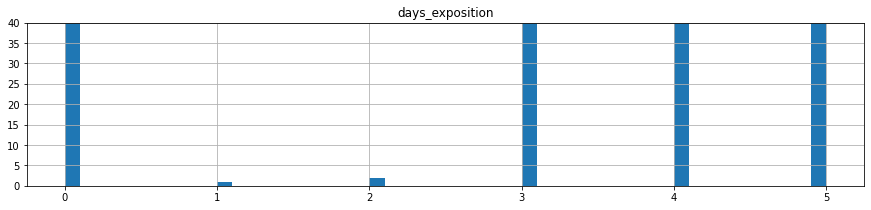

In [86]:

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [87]:


try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [88]:

df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


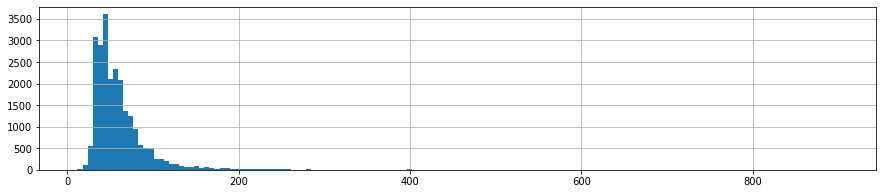

In [89]:

df_check.total_area.hist(bins = 150, figsize = (15,3));

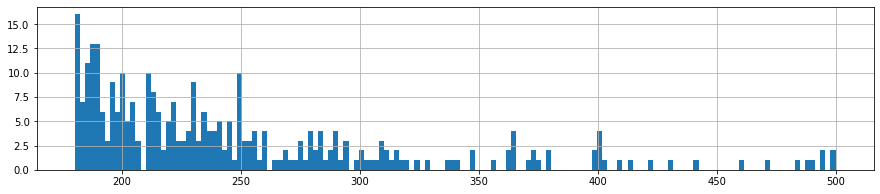

In [90]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

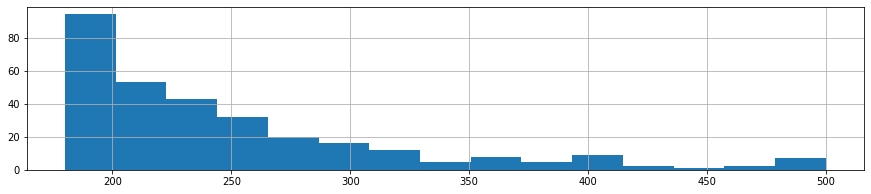

In [91]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

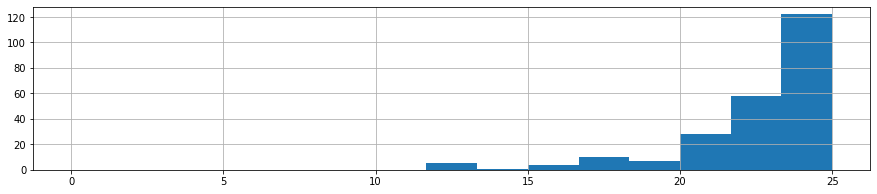

In [92]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [93]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.34,2.40,0.00,"1,073,808.00",9.70,0.00,1.00,2.00
0.01,1.00,28.00,2.50,0.00,"1,300,000.00",12.00,4.80,1.00,2.00
0.5,2.00,52.00,2.60,74.00,"4,650,000.00",30.00,9.50,4.00,9.00
0.99,5.00,166.00,3.50,954.16,"27,944,224.00",105.83,24.40,22.00,26.00
0.9988,7.00,244.01,4.00,"1,156.24","68,309,600.00",164.73,28.54,26.00,27.00


## Шаг 3. Добавление столбцов

Добавим цену за м2

In [94]:
data['square_meter_price'] =  data['last_price'] / data['total_area']

Добавим день публикации

In [95]:
def week_day(time) -> int:
    return time.weekday()
data['week_day_exposition'] = data['first_day_exposition'].apply(week_day)

Добавим месяц публикации

In [96]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим год публикации

In [97]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим тип этажа публикации

In [98]:
def floor_category(data:pd.DataFrame) -> pd.DataFrame:
    i = 0
    while i < len(data.floor):
        if data.loc[i,'floor'] == 1:
            data.loc[i, 'floor_type'] = 'first'
        elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
            data.loc[i, 'floor_type'] = 'last'
        else:
            data.loc[i, 'floor_type'] = 'else'
        i +=1
    return data

In [99]:
data = floor_category(data)

In [100]:

def divide_100 (df):
    
    row = df.total_images
    
    if row < 10:
        return row * 100
    else:
        return row / 10
    
data['total_images_100'] = data.apply(divide_100, axis = 1)
data['total_images_100'].head(4)

0      2.0
1    700.0
2      1.0
3      0.0
Name: total_images_100, dtype: float64

Добавим расстояние в км до центра города

In [101]:
data['city_centers_nearest_km'] =  data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data[data['city_centers_nearest_km'].isna() == False].city_centers_nearest_km.apply(round)

**Результат:**

In [102]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,total_images_100,city_centers_nearest_km
6973,13,2950000.0,31.0,2018-10-19,1,2.50,5,17.60,4,False,...,NaN,28,E,95161.290323,4,10,2018,else,1.3,12.0
19663,9,5500000.0,51.5,2018-04-26,2,2.64,16,29.00,15,False,...,1130.0,0,B,106796.116505,3,4,2018,else,900.0,13.0
13449,5,10500000.0,85.0,2018-02-09,2,2.70,5,54.75,3,False,...,103.0,135,А,123529.411765,4,2,2018,else,500.0,3.0
5414,0,4099000.0,41.0,2015-11-17,3,2.60,6,29.00,5,False,...,580.0,245,C,99975.609756,1,11,2015,else,0.0,10.0
7166,22,7875000.0,68.0,2017-11-12,2,3.00,25,36.50,13,False,...,NaN,60,А,115808.823529,6,11,2017,else,2.2,16.0
6103,6,3307095.0,35.4,2018-04-04,1,2.80,17,12.59,10,False,...,NaN,45,D,93420.762712,2,4,2018,else,600.0,15.0
7360,3,1890000.0,43.0,2018-12-27,2,2.55,5,30.00,5,False,...,NaN,19,E,43953.488372,3,12,2018,last,300.0,NaN
20632,6,3100000.0,27.3,2018-05-29,0,2.70,16,23.30,15,False,...,NaN,59,D,113553.113553,1,5,2018,else,600.0,10.0
9194,9,5700000.0,51.2,2015-08-14,1,2.66,16,22.80,3,False,...,NaN,605,B,111328.125000,4,8,2015,else,900.0,10.0
248,2,14700000.0,120.0,2018-09-07,3,2.75,20,63.00,18,False,...,77.0,61,А,122500.000000,4,9,2018,else,200.0,10.0


## Шаг 4. Исследовательский анализ данных

### 4.1. Гистограммы

#### 4.1.1 Гистограмма общей площади

count    21985.000000
mean        58.461264
std         27.538368
min         15.500000
25%         40.200000
50%         52.000000
75%         68.300000
max        297.500000
Name: total_area, dtype: float64

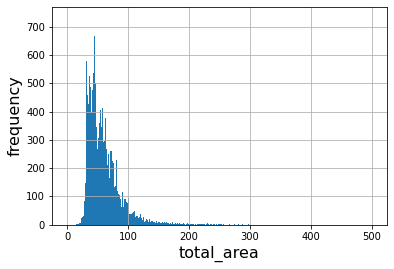

In [103]:
data['total_area'].hist(bins= 500, range= (0,500), grid= True);
plt.xlabel('total_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['total_area'].describe()

Text(0, 0.5, 'frequency')

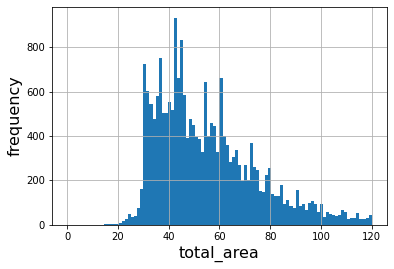

In [104]:
data['total_area'].hist(bins= 100, range= (0,120), grid= True);
plt.xlabel('total_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Площадь объектов недвижимости находится в диапазоне от 9 до ~630м2. Большинство объектов недвижимости (межквартильный интервал) имеют площадь от 40 до 68 м2. Средняя площадь - 58 м2. С оговорками можно сказать, что гистограмма имеет характер нормального распределения с отклонением в сторону квартир площадью 30-60 м2, что объясняется востребованостью таких квартир

#### 4.1.2 Гистограмма жилой площади

count    21985.000000
mean        33.559201
std         18.969538
min          9.020000
25%         18.600000
50%         30.000000
75%         42.000000
max        195.850000
Name: living_area, dtype: float64

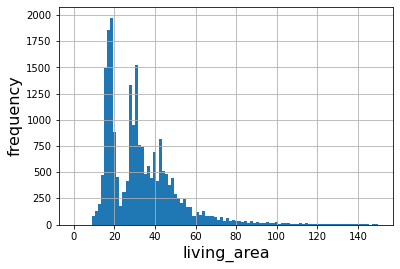

In [105]:
data['living_area'].hist(bins= 100, range= (0,150), grid= True);
plt.xlabel('living_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['living_area'].describe()

**Вывод:** Жилая площадь объектов недвижимости находится в диапазоне от 9 до 195м2. Большое количество около минимального значения объясняется тем, что в комнатах и студиях нет кухни (практически вся площадь - жилая).Большинство объектов недвижимости (межквартильный интервал) имеют жилую площадь от 18 до 42 м2. Средняя жилая площадь - ~34 м2. Имеются пики в области публикаций до 20 м2 и 25-30 м2.

#### 4.1.2 Гистограмма площади кухни

count    21985.000000
mean        10.483804
std          4.411926
min          0.000000
25%          7.100000
50%          9.500000
75%         12.600000
max         29.900000
Name: kitchen_area, dtype: float64

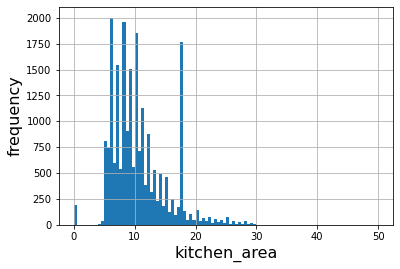

In [106]:
data['kitchen_area'].hist(bins= 100, range= (0,50), grid= True);
plt.xlabel('kitchen_area', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data['kitchen_area'].describe()

**Вывод:** Площадь кухни объектов недвижимости находится в диапазоне от 4 до ~29м2. Большое количество около нуля объясняется тем, что в комнатах и студиях нет кухни. Большинство объектов недвижимости (межквартильный интервал) имеют площадь кухни от 7 до ~13 м2. Средняя площадь кухни - 10,5 м2. В целом, по частоте некоторых значений можно утверждать, что самыми распространенными являются кухни площадью от 7 до 12 м2

#### 4.1.3 Гистограмма цены объекта

count    2.198500e+04
mean     6.020082e+06
std      6.048433e+06
min      1.010000e+06
25%      3.499000e+06
50%      4.650000e+06
75%      6.607000e+06
max      2.450000e+08
Name: last_price, dtype: float64


Text(0, 0.5, 'frequency')

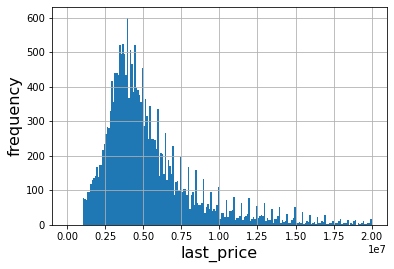

In [107]:
print(data['last_price'].describe())
data['last_price'].hist(bins= 200, range= (1e+04,0.2e+08), grid= True);
plt.xlabel('last_price', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Цена объектов недвижимости находится в диапазоне от 1 млн до 2.45 млрд . Большинство объектов недвижимости (межквартильный интервал) имеют стоимость от 3,5 млн до 6.6 млн. В целом распределение на данном участке можно считать нормальным

#### 4.1.4 Гистограмма количества комнат

count    21985.000000
mean         2.052445
std          1.011949
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'frequency')

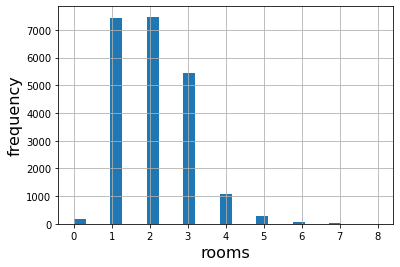

In [108]:
print(data['rooms'].describe())
data['rooms'].hist(bins= 25, range= (0,8), grid= True);
plt.xlabel('rooms', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Количество комнат объектов недвижимости находится в диапазоне от 0 до 7. Значения около нуля объясняются студиями и отдельными комнатами. Большинство объектов недвижимости (межквартильный интервал) имеют количество комнат от 1 до 3 В целом распределение комнат на участке от 1 до 3 можно считать нормальным.

#### 4.1.5 Гистограмма высоты потолков

count    21985.000000
mean         2.692176
std          0.220028
min          2.200000
25%          2.550000
50%          2.600000
75%          2.760000
max          4.450000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'frequency')

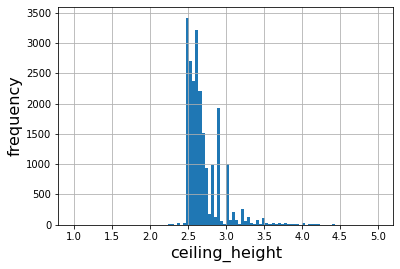

In [109]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins= 100, range= (1,5), grid= True);
plt.xlabel('ceiling_height', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Высота потолков объектов недвижимости находится в диапазоне от 2 до 4.5 м. Большинство объектов недвижимости (межквартильный интервал) имеют высоту потолков от 2.5 до 2.76. Большое количество потолков выотой 2,5 и 2,7м объяснятется массовым строительством жил плозади с данной высотой потолков в прошлом 

#### 4.1.6 Гистограмма этажа квартиры

count    21985.000000
mean         5.863316
std          4.823515
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64


Text(0, 0.5, 'frequency')

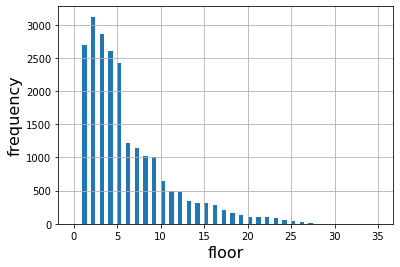

In [110]:
print(data['floor'].describe())
data['floor'].hist(bins= 70, range= (0,35), grid= True)
plt.xlabel('floor', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Этаж квартиры объектов недвижимости находится в диапазоне от 1 до 32. Большинство объектов недвижимости (межквартильный интервал) находится на этаже от 3 до 8-ого. Самые частые - от 2-ого до 5-ого

#### 4.1.7 Гистограмма типа этажа квартиры

count     21985
unique        3
top        else
freq      16248
Name: floor_type, dtype: object


Text(0, 0.5, 'frequency')

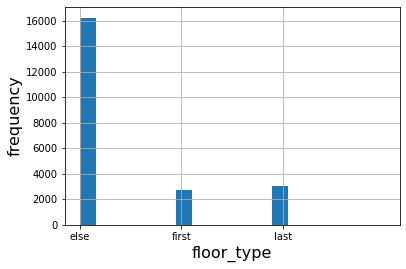

In [111]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True)
plt.xlabel('floor_type', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Естестественно большое всего объявлений ни с первого и последнего этажа

#### 4.1.8 Гистограмма общего количества этажей в доме

count    21985.000000
mean        10.680327
std          6.492484
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64


Text(0, 0.5, 'frequency')

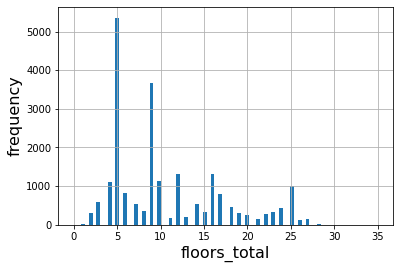

In [112]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins= 80, range= (0,35), grid= True);
plt.xlabel('floors_total', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Общее количество этажей объектов недвижимости находится в диапазоне от 1 до 33. Большинство объектов недвижимости (межквартильный интервал) имеет количество этажей от 5 до 16-ого. Самые частые - 5-ти, 9-ти, 6-ти и 12-ти этажки

#### 4.1.9 Гистограмма расстояния до центра города в метрах

count    17087.000000
mean     14337.337332
std       8611.596751
min        181.000000
25%       9504.500000
50%      13188.000000
75%      16293.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64


Text(0, 0.5, 'frequency')

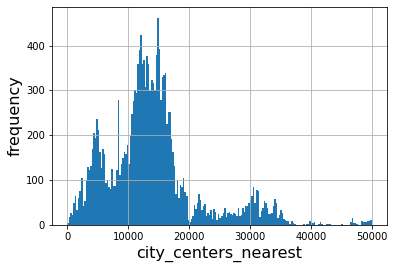

In [113]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins= 200, range= (0,50000), grid= True);
plt.xlabel('city_centers_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Расстояния до центра города объектов недвижимости находится в диапазоне от 181м до 66км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от центра города от 9,6 км до 16 км. Распределение на данном интервале можно считать нормальным.

#### 4.1.10 Гистограмма расстояния до расстояние до ближайшего аэропорта

count    17014.000000
mean     28819.860585
std      12730.305640
min          0.000000
25%      18433.500000
50%      26798.000000
75%      37347.000000
max      84869.000000
Name: airports_nearest, dtype: float64


Text(0, 0.5, 'frequency')

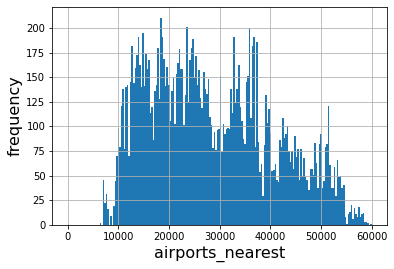

In [114]:
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins= 200, range= (0,60000), grid= True);
plt.xlabel('airports_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** От аэропорта до объектов недвижимости находится в диапазоне от 9 до 85км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от аэропорта до объекта недвижимости от 18,43 км до 37 км. 

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего парка

count    7527.000000
mean      491.165006
std       338.068242
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


Text(0, 0.5, 'frequency')

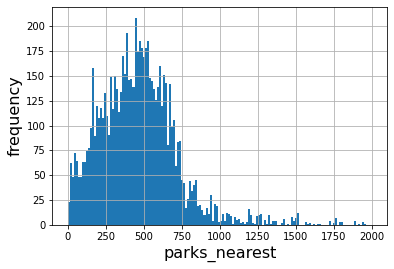

In [115]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins= 150, range= (0,2000), grid= True);
plt.xlabel('parks_nearest', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** От ближайшего парка до объектов недвижимости находится в диапазоне от 21м до 3км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от парка до объекта недвижимости от 300 м до 600 м. Такие значения объясняются тем что скорее всего, если до парка больше 1,5 км - считается что парка по близости нет

#### 4.1.11 Гистограмма расстояния до расстояние до ближайшего водоема

count    8405.000000
mean      524.830220
std       276.581384
min        13.000000
25%       303.000000
50%       510.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


427.0     59
454.0     41
433.0     37
474.0     36
564.0     35
          ..
845.0      1
740.0      1
1313.0     1
949.0      1
995.0      1
Name: ponds_nearest, Length: 1090, dtype: int64

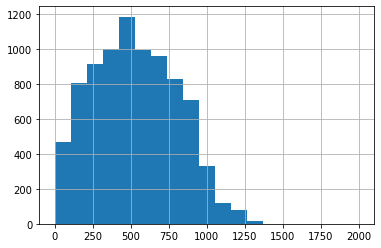

In [116]:
print(data['ponds_nearest'].describe())
data['ponds_nearest'].hist(bins= 19, range= (0,2000), grid= True)
data['ponds_nearest'].value_counts()

**Вывод:** От ближайшего водоема до объектов недвижимости находится в диапазоне от 22м до 1,4 км. Большинство объектов недвижимости (межквартильный интервал) находится на расстоянии от водоема до объекта недвижимости от 276 м до 712 м. Такие значения объясняются тем что скорее всего, если до водоема больше 1,25 км - считается что водоема по близости нет

#### 4.1.12 Гистограмма типа этажа квартиры («первый», «последний», «другой»);

count     21985
unique        3
top        else
freq      16248
Name: floor_type, dtype: object


Text(0, 0.5, 'frequency')

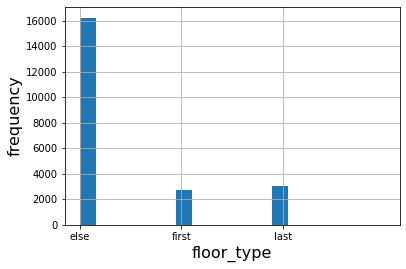

In [117]:
print(data['floor_type'].describe())
data['floor_type'].hist(bins= 19, range= (0,3), grid= True);
plt.xlabel('floor_type', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Естественно, по количеству лидируют не первые и не последние этажи

#### 4.1.13 Гистограмма дня публикации объявления

count    21985.000000
mean         2.566705
std          1.787680
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_day_exposition, dtype: float64


Text(0, 0.5, 'frequency')

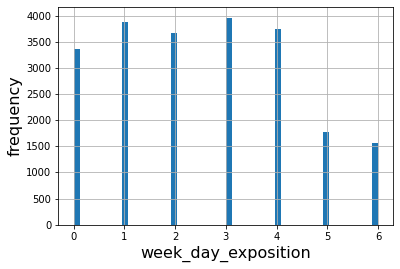

In [118]:
print(data['week_day_exposition'].describe())
data['week_day_exposition'].hist(bins= 50, range= (0,6), grid= True);
plt.xlabel('week_day_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** В выходные объявлений выкладывается меньше, что логично. По будням существенных различий нет

#### 4.1.14 Гистограмма месяца публикации

count    21985.000000
mean         6.419104
std          3.493121
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64


Text(0, 0.5, 'frequency')

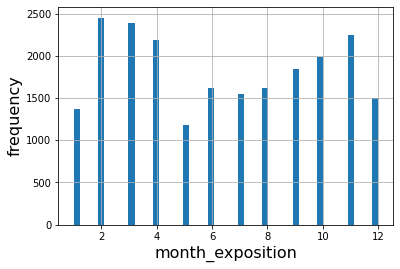

In [119]:
print(data['month_exposition'].describe())
data['month_exposition'].hist(bins= 50, range= (1,12), grid= True);
plt.xlabel('month_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)

**Вывод:** Периоды наибольшей активности: февраль-апрель, сентябрь-ноябрь. Это объясняется праздниками и летними отпусками

### 4.2. Анализ

### 4.2.1 Как быстро продавались квартиры ?

median     74.000000
mean      151.934683
Name: days_exposition, dtype: float64

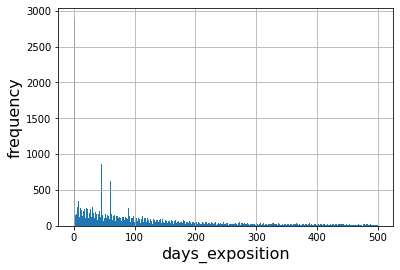

In [120]:
data.days_exposition.hist(bins= 300, range= (0,500), grid= True);
plt.xlabel('days_exposition', fontsize = 16)
plt.ylabel('frequency', fontsize = 16)
data.days_exposition.agg({'mean', 'median'})

In [121]:
data.days_exposition.describe()

count    21985.000000
mean       151.934683
std        199.855078
min          0.000000
25%         23.000000
50%         74.000000
75%        196.000000
max       1199.000000
Name: days_exposition, dtype: float64

In [122]:
data[data['days_exposition'] < 45].sort_values(by= 'days_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,total_images_100,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,0,А,120370.370370,3,3,2019,else,2.0,16.0
11261,12,2400000.0,32.0,2019-03-21,1,2.55,5,18.0,2,False,...,NaN,0,E,75000.000000,3,3,2019,else,1.2,NaN
11268,9,5600000.0,54.6,2019-04-08,2,2.66,9,31.1,3,False,...,1115.0,0,B,102564.102564,0,4,2019,else,900.0,22.0
11281,10,1700000.0,62.4,2019-04-22,3,2.50,3,37.7,2,False,...,NaN,0,E,27243.589744,0,4,2019,else,1.0,NaN
11282,7,3999000.0,35.6,2018-11-28,1,2.50,14,17.5,14,False,...,NaN,0,D,112331.460674,2,11,2018,last,700.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7206,1,4390000.0,151.8,2017-04-28,6,3.50,6,106.5,6,False,...,NaN,44,C,28919.631094,4,4,2017,last,100.0,2.0
10841,9,4290000.0,60.8,2018-06-30,2,2.60,9,31.8,2,False,...,382.0,44,C,70559.210526,5,6,2018,else,900.0,30.0
3281,17,37272000.0,100.6,2016-06-26,3,2.90,8,57.5,8,False,...,473.0,44,А,370497.017893,6,6,2016,last,1.7,7.0
21309,12,5800000.0,50.0,2019-02-12,2,2.65,16,29.2,8,False,...,638.0,44,B,116000.000000,1,2,2019,else,1.2,12.0


**Вывод:** В среднем (по межквартильному размаху) квартиры продаются от 0 до 1199 дней. Медианное значение - 151 дней.  Быстрыми считаются продажи < 23 дней. Долгими > 196 дней

Text(0, 0.5, 'days_exposition')

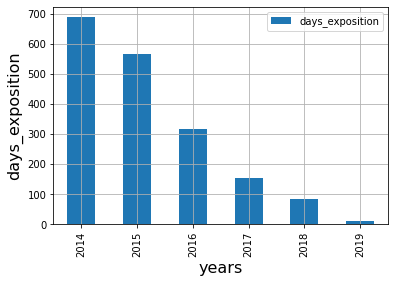

In [123]:
(data
 .groupby('year_exposition')
 .mean()
 .reset_index(drop= False)
 .plot.bar(x= 'year_exposition', y= 'days_exposition', grid =True) 
);
plt.xlabel('years', fontsize = 16)
plt.ylabel('days_exposition', fontsize = 16)


**Вывод:** Наблюдается существенное уменьшение времени продажи квартиры

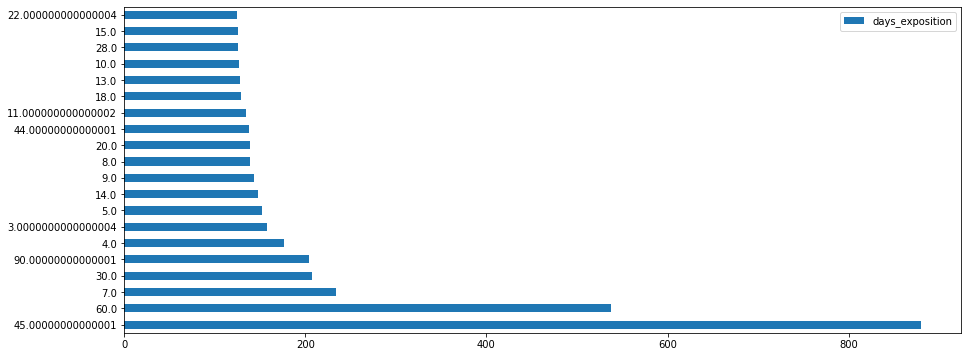

In [124]:

    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [125]:
print('самая долгая продажа:', data['days_exposition'].max())

самая долгая продажа: 1199


In [126]:
print('самая быстрая:', data['days_exposition'].min())

самая быстрая: 0


### 4.2.2 Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Построим матрицу корреляции

In [127]:
corr = data.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,year_exposition,total_images_100,city_centers_nearest_km
total_images,1.000000,0.124000,0.110000,0.090000,0.070000,0.009000,0.098000,0.031000,0.009000,-0.027000,-0.028000,0.044000,0.047000,0.000000,-0.045000,0.030000,-0.010000,0.001000,0.000000,-0.058000,0.133000,-0.009000,0.005000,0.146000,-0.423000,-0.045000
last_price,0.124000,1.000000,0.706000,0.426000,0.466000,0.018000,0.640000,0.034000,0.024000,-0.038000,-0.020000,0.413000,0.007000,-0.037000,-0.282000,0.271000,-0.014000,0.265000,-0.108000,0.053000,0.746000,-0.003000,0.010000,-0.049000,-0.081000,-0.283000
total_area,0.110000,0.706000,1.000000,0.793000,0.517000,-0.067000,0.947000,-0.034000,0.020000,-0.087000,-0.051000,0.492000,0.015000,-0.036000,-0.243000,0.196000,-0.009000,0.200000,-0.080000,0.088000,0.240000,-0.011000,0.008000,-0.079000,-0.087000,-0.243000
rooms,0.090000,0.426000,0.793000,1.000000,0.316000,-0.236000,0.854000,-0.165000,-0.002000,-0.152000,-0.092000,0.215000,-0.016000,-0.062000,-0.174000,0.138000,-0.049000,0.109000,-0.046000,0.064000,-0.004000,-0.005000,-0.005000,-0.045000,-0.072000,-0.173000
ceiling_height,0.070000,0.466000,0.517000,0.316000,1.000000,-0.051000,0.469000,-0.026000,0.057000,-0.009000,-0.021000,0.365000,-0.046000,-0.090000,-0.354000,0.276000,-0.032000,0.264000,-0.111000,0.067000,0.383000,-0.013000,0.002000,-0.048000,-0.055000,-0.354000
floors_total,0.009000,0.018000,-0.067000,-0.236000,-0.051000,1.000000,-0.167000,0.674000,-0.025000,0.072000,0.050000,0.208000,0.173000,0.117000,0.007000,-0.160000,0.100000,-0.065000,0.066000,-0.024000,0.181000,0.013000,0.017000,0.004000,-0.022000,0.007000
living_area,0.098000,0.640000,0.947000,0.854000,0.469000,-0.167000,1.000000,-0.107000,0.021000,-0.060000,-0.035000,0.311000,-0.011000,-0.057000,-0.233000,0.201000,-0.036000,0.178000,-0.068000,0.081000,0.172000,-0.009000,0.003000,-0.067000,-0.074000,-0.233000
floor,0.031000,0.034000,-0.034000,-0.165000,-0.026000,0.674000,-0.107000,1.000000,-0.013000,0.037000,0.035000,0.146000,0.170000,0.081000,0.004000,-0.105000,0.073000,-0.042000,0.044000,-0.018000,0.146000,0.009000,0.020000,0.004000,-0.026000,0.004000
is_apartment,0.009000,0.024000,0.020000,-0.002000,0.057000,-0.025000,0.021000,-0.013000,1.000000,-0.003000,-0.002000,0.029000,0.029000,0.022000,0.010000,0.019000,-0.026000,0.022000,0.005000,0.005000,0.030000,-0.016000,-0.000000,0.012000,-0.004000,0.010000
studio,-0.027000,-0.038000,-0.087000,-0.152000,-0.009000,0.072000,-0.060000,0.037000,-0.003000,1.000000,-0.004000,-0.186000,0.034000,-0.019000,-0.009000,-0.034000,0.009000,-0.015000,0.008000,-0.014000,0.022000,-0.002000,0.001000,0.009000,0.016000,-0.009000


###### Корреляции к last_price:

        - общей площади : 0.639000
        - жилой площади : 0.569000
        - площади кухни : 0.381000
        - количество комнат : 0.386000         
        - даты размещения (день недели) : 0.005000
        - даты размещения (месяц): -0.016000
        - даты размещения (год): -0.025000

Теперь посмотрим зависимость между средней ценой и типом этажа 

In [128]:
list1 = ['else',data[data['floor_type'] == 'else'].last_price.median()/1e06]
list2 = ['first',data[data['floor_type'] == 'first'].last_price.median()/1e06]        
list3 = ['last',data[data['floor_type'] == 'last'].last_price.median()/1e06]      
floor_type_price = pd.DataFrame([list1, list2, list3], columns= ['floor_type', 'median_price'])
floor_type_price.head()

,floor_type,median_price
0,else,4.80
1,first,3.98
2,last,4.30


In [129]:
data[data['floor_type'] == 'else'].last_price.count()

16248

In [130]:
data[data['floor_type'] == 'first'].last_price.count()

2693

In [131]:
data[data['floor_type'] == 'last'].last_price.count()

3044

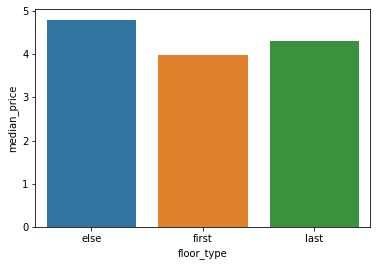

In [132]:
sns.barplot(data= floor_type_price, x='floor_type', y='median_price');

**Графики**

Общая площадь-стоимость

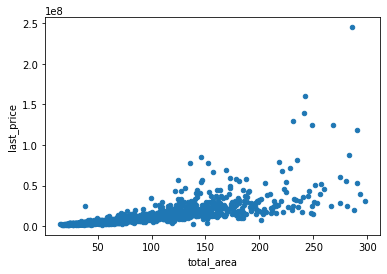

In [133]:
total_area_last_price = data.pivot_table(index= 'total_area', values= 'last_price').reset_index(drop = False)
total_area_last_price.plot(x= 'total_area', y='last_price', kind= 'scatter'); 

Жилая площадь-полная стоимость

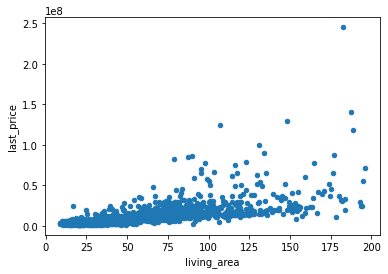

In [134]:
living_area_last_price = data.pivot_table(index= 'living_area', values= 'last_price').reset_index(drop = False)
living_area_last_price.plot(x='living_area', y='last_price' ,kind= 'scatter');

Площадь кухни-полная стоимость

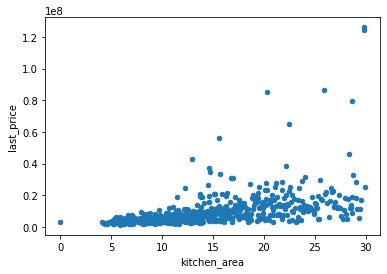

In [135]:
kitchen_area_last_price = data.pivot_table(index= 'kitchen_area', values= 'last_price').reset_index(drop = False)
kitchen_area_last_price.plot(x='kitchen_area', y='last_price' ,kind= 'scatter');

Количество комнат-полная стоимость

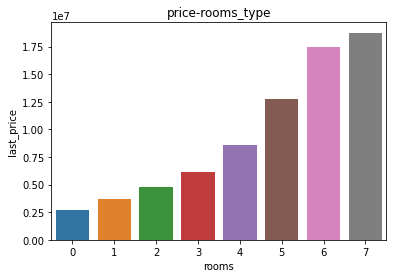

In [136]:
rooms_total_price = data.pivot_table(index= 'rooms', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= rooms_total_price , x='rooms', y='last_price')
);
plt.title('price-rooms_type')
plt.show()

Тип этажа-полная стоимость

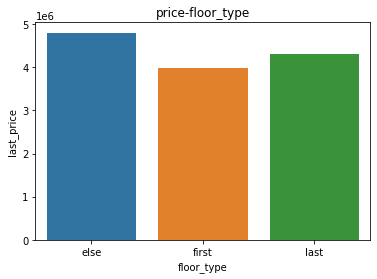

In [137]:
floor_last_price = data.pivot_table(index= 'floor_type', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= floor_last_price , x='floor_type', y='last_price')
);
plt.title('price-floor_type')
plt.show()

День недели размещения - полная стоимость

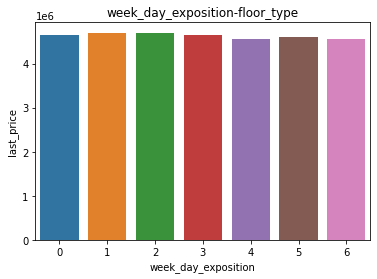

In [138]:
day_last_price = data.pivot_table(index= 'week_day_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= day_last_price , x='week_day_exposition', y='last_price')
);
plt.title('week_day_exposition-floor_type')
plt.show()

Месяц размещения -полная стоимость

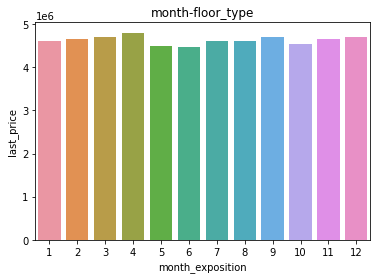

In [139]:
month_last_price = data.pivot_table(index= 'month_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= month_last_price , x='month_exposition', y='last_price')
);
plt.title('month-floor_type')
plt.show()

Год размещения -полная стоимость

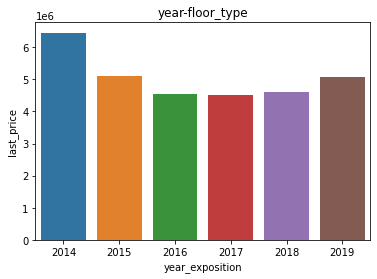

In [140]:
year_last_price = data.pivot_table(index= 'year_exposition', values= 'last_price', aggfunc= 'median').reset_index(drop = False)
(sns.barplot(data= year_last_price , x='year_exposition', y='last_price')
);
plt.title('year-floor_type')
plt.show()

Text(0, 0.5, 'last_price')

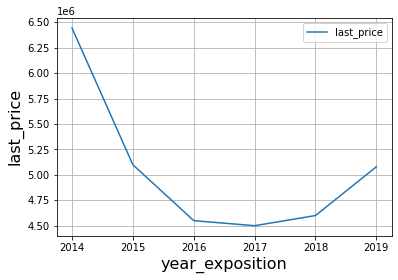

In [141]:
year_last_price.plot(x= 'year_exposition', y='last_price', kind= 'line', grid= True);
plt.xlabel('year_exposition', fontsize = 16)
plt.ylabel('last_price', fontsize = 16)

Расстояние до центра -полная стоимость

Text(0, 0.5, 'last_price')

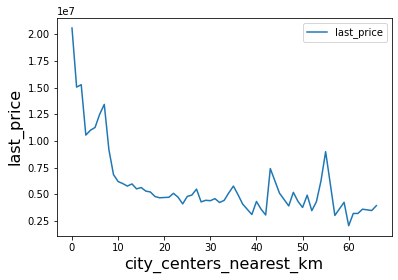

In [142]:
center_distance_last_price = data.pivot_table(index= 'city_centers_nearest_km', values= 'last_price').reset_index(drop = False)
center_distance_last_price.plot(x='city_centers_nearest_km', y='last_price' ,kind= 'line');
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('last_price', fontsize = 16)

**Вывод:**

На цену объекта недвижимости влияют:     
  
        - общая площадь (соответствено и жилая площадь, площадь кухни, количество комнат и цена м2)  
        - расстояние от центра 
        - год продажи 

День и месяц практически не влияют на цену. В 2016-2018 годах наблюдается существенное снижение цен. Не смотря на то, что медианная цена на квартиры не на последнем и первом этаже больше, количество квартир на первом и последнем этажах мало, что не позволяет делать однозначный вывод

### 4.2.3 Расчитаем среднюю стоимость м2 

In [143]:
median_price = (
 data
 .pivot_table(index= 'locality_name', values= ['square_meter_price'], aggfunc= ['median', 'count'])
 .reset_index(drop = False) 
)
median_price.columns = ['locality_name', 'median_square_meter_price', 'count'] 

median_price = median_price.sort_values(by= 'count', ascending = False).head(10)

median_price['median_square_meter_price'] = (
  median_price['median_square_meter_price'] 
 .apply(round)
)

Строим график

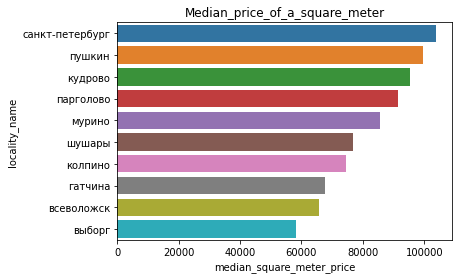

In [144]:
(sns.barplot(data= median_price.sort_values(by= 'median_square_meter_price', 
                                            ascending = False) , x='median_square_meter_price', y='locality_name')
);
plt.title('Median_price_of_a_square_meter')
plt.show()

**Вывод:**

В лидерах по цене квадратного метра Санкт-Петербург и пригороды

### 4.2.3 Расчитаем стоимость "километра" в Спб

Расчитает расстояние в километрах от центра до самого дальнего объекта недвижимости 

In [145]:
spb = data[data['locality_name'] == 'санкт-петербург']

In [146]:
max_km = spb.city_centers_nearest_km.max()
max_km

29.0

In [147]:
zero_km_price = spb[spb['city_centers_nearest_km'] == 0].last_price.median()
max_km_price =  spb[spb['city_centers_nearest_km'] == 29].last_price.median()
difference_km_price = zero_km_price - max_km

In [148]:
difference_km_price/1e5 

124.99971

C приближением к центру города стоимость квартиры увеличивается в среднем на ~125 тыс.руб за 1 км

In [149]:
spb_km_price = spb.groupby('city_centers_nearest_km').median().reset_index(drop= False)

Text(0, 0.5, 'square_meter_price')

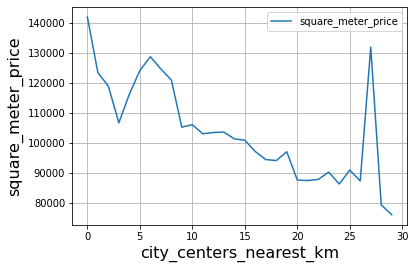

In [150]:
spb_km_price.plot(x= 'city_centers_nearest_km', y='square_meter_price', kind= 'line', grid= True);
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('square_meter_price', fontsize = 16)

Посмотрим чем вызван всплеск на 27 км

In [151]:
spb[spb['city_centers_nearest_km'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_category,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,total_images_100,city_centers_nearest_km
689,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,NaN,128,А,193918.918919,1,11,2017,else,1.3,27.0
5534,6,2250000.0,32.0,2018-02-27,1,2.55,2,16.5,2,False,...,NaN,178,E,70312.500000,1,2,2018,last,600.0,27.0


Двухкомнатная квартира на 74 м2 видимо находится в элитной новостройке. Уберем данное значение как выброс

In [152]:
spb.loc[spb['city_centers_nearest_km'] == 27, 'city_centers_nearest_km'] = spb.query('city_centers_nearest_km == 26')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [153]:
spb_km_price = spb.groupby('city_centers_nearest_km').median().reset_index(drop= False)

Text(0, 0.5, 'square_meter_price')

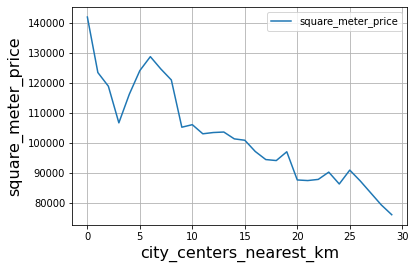

In [154]:
spb_km_price.plot(x= 'city_centers_nearest_km', y='square_meter_price', kind= 'line', grid= True);
plt.xlabel('city_centers_nearest_km', fontsize = 16)
plt.ylabel('square_meter_price', fontsize = 16)

Скорее всего пик и провал в центре вызваны количеством квартир на первом и последним этажах на данных километрах

In [155]:
spb3_km = spb[spb['city_centers_nearest_km'] == 3].groupby('floor_type').count()
spb5_km = spb[spb['city_centers_nearest_km'] == 5].groupby('floor_type').count()
spb10_km =spb[spb['city_centers_nearest_km'] == 10].groupby('floor_type').count()

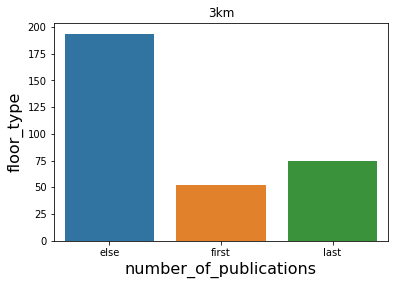

In [156]:
sns.barplot(data= spb3_km, x= spb3_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('3km')
plt.show()

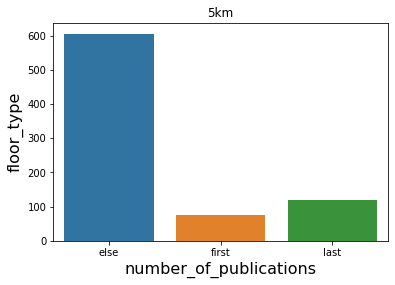

In [157]:
sns.barplot(data= spb5_km, x= spb5_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('5km')
plt.show()

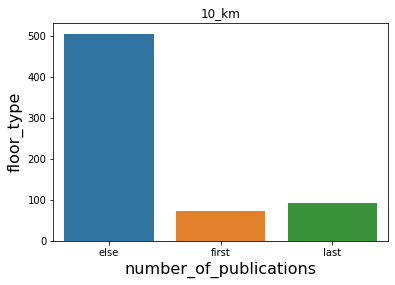

In [158]:
sns.barplot(data= spb10_km, x= spb10_km.index, y='rooms');
plt.xlabel('number_of_publications', fontsize = 16)
plt.ylabel('floor_type', fontsize = 16)
plt.title('10_km')
plt.show()

На 3-ем километре квартир в категориях "первый этаж " или "последний этаж " заметно больше. Этим объясняется провал
На 5-ом километре квартир в категории "другой" больше. Этим объясняется всплеск

## Шаг 5. Общий вывод

#### 5.1. Цель работы: 

По данным от Яндекс недвижимости выполнить предобработку данных и изучить их,   
чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости, а именно:
    
1. Изучить, как быстро продавались квартиры
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
4. Найти закономерность между стоимостью объектов зависит от расстояния до центра города.

#### 5.2. Анализ и предобработка представленного датасета с данными о заемщиках банка с данными о недвижимости по Спб и Ленинградской области

В рамках предобработки данных были обнаружены следующие ошибки в датасете:
    
    1. Наименование столбца cityCenters_nearest несоответствует snake_case
    2. В столбцах  ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest,  
    cityCenters_nearest, parks_around3000, parks_neares, ponds_around3000, ponds_nearest, first_day_exposition 
    имеют пропуски (значения NaN). Данные пропуски связаны как с человеческим фактором так и с ошибками в стороннем ПО 
    и сборе данных
    3. Наличие выбросов в датасете. Например явные ошибки при записи десятичных дробей в высоте пололков (25 вместо 2.5)
    4. Наличие неявных дубликатов в столбце locality_name. Например поселок городского типа Рябово и посёлок Рябово  
    5. Неверный тип переменных в столбцах. Например object в столбце is_apartament или float в столбце days_exposition 

В ходе предобработки данного датасета **были выполнены следующие действия:**  

1. Пропуски в столбцах где это возможно были заполнены медианным значением из соответствующих группc помощью логической индексации и метода  (например столбцы kitchen_area и living_area медианными значениями по группам по количеству комнат) .median()
2. Где это было логически обосновано, пропуски были заполнены нулями (например в столбце is_apartament и balcony)
3. Изменены типы столбцов is_apartament и balcony, first_day_exposition, floors_total, parks_around3000, ponds_around300
3. Обработаны неявные дубликаты в столбце locality_name: значения в столбце приведены к одному регистру с помощью метода .str.lower(), убраны наименования населенных пунктов.

Для дальнейшего анализа были добавлены столбцы:

 1. цена одного квадратного метра
 2. день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
 3. месяц публикации объявления
 4. год публикации объявления
 5. тип этажа квартиры (значения — «первый», «последний», «другой»)
 6. расстояние в км до центра города

После преобработки данных по каждому столбцу были построены гистограммы для визуализации результатов

В ходе дальнейшего анализа для определения факторов, влияющих на цену объекта недвижимости, была построена таблица корреляции ниже

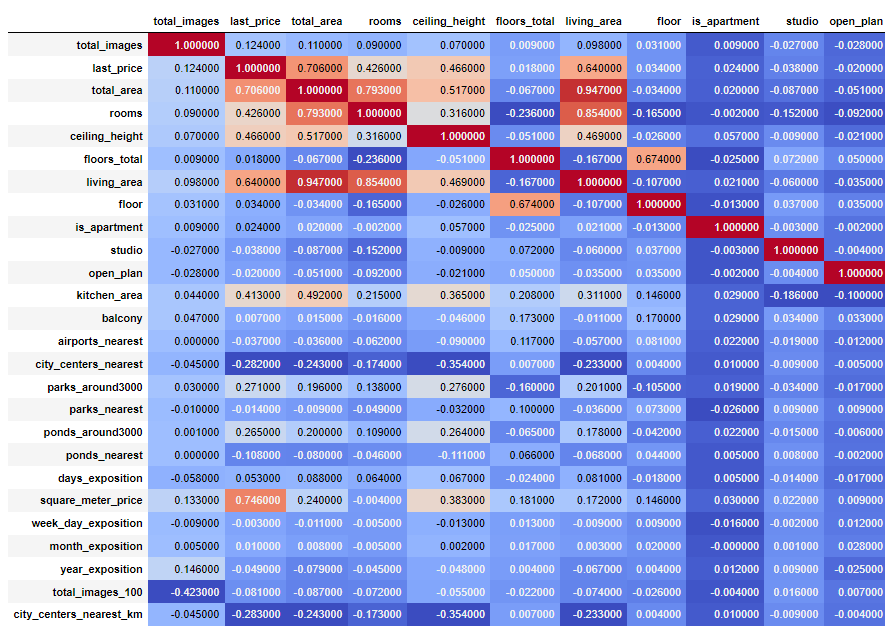

Так же расчитаны средние цены квадратного метра по локациям объекта недвижимости 

и расчитана цена "километра" при приближении к центру Спб от окраинше всего влияют на общую (полную) стоимость объекта?

#### 5.3. Общий вывод

**Вывод по динамике продаж:**  
  
В среднем объекты недвижимости продаются от 45 до 167 дней. Медианное значение - 90 дней. Минимальное - 11 дней. Быстрыми считаются продажи меньше 45 дней. Долгими - больше 167 дней

**Вывод по факторам, влияющим на стоимость объекта недвижимости:**

На цену объекта недвижимости влияют:     
  
        - общая площадь (соответствено и жилая площадь, площадь кухни, количество комнат и цена м2)  
        - расстояние от центра 
        - год продажи 

Для двух последних даны графики ниже

**Цена - расстояние до центра**

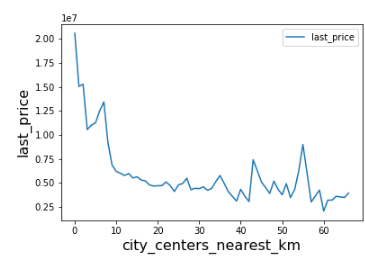

**Цена - год продажи**

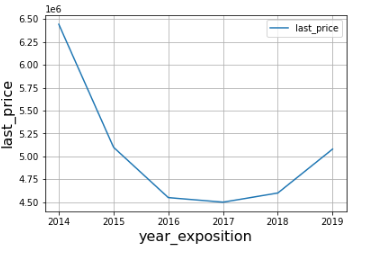

День и месяц практически не влияют на цену. В 2016-2018 годах наблюдается существенное снижение цен. Не смотря на то, что медианная цена на квартиры не на последнем и первом этаже больше, количество квартир на первом и последнем этажах мало, что не позволяет делать однозначный вывод

**Вывод по цене квадратного метра:**

Самые большие цены за м2 в Спб и  пригородах. Сводка с ценами за м2 дана в таблице ниже

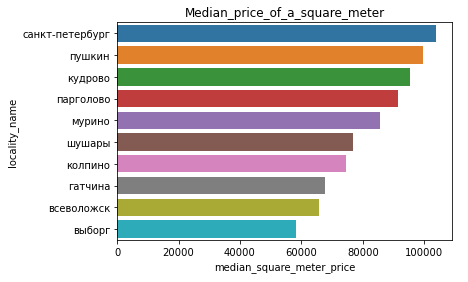

**Вывод по наличию закономерности между стоимости объектов и расстояния до центра города**:

C приближением к центру города стоимость квартиры увеличивается в среднем на ~125 тыс.руб за 1 км. 
Динамика изменения цены по км дана ниже

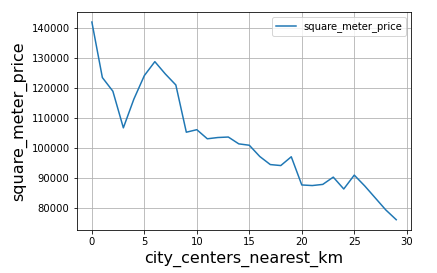

Провал на 3-ем километре объясняется тем, что квартир в категориях "первый этаж " или "последний этаж " на 3 км заметно больше. 
Всплеск 5-ом километре объясняется тем, что квартир в категории "другой" на 5 км заметно больше

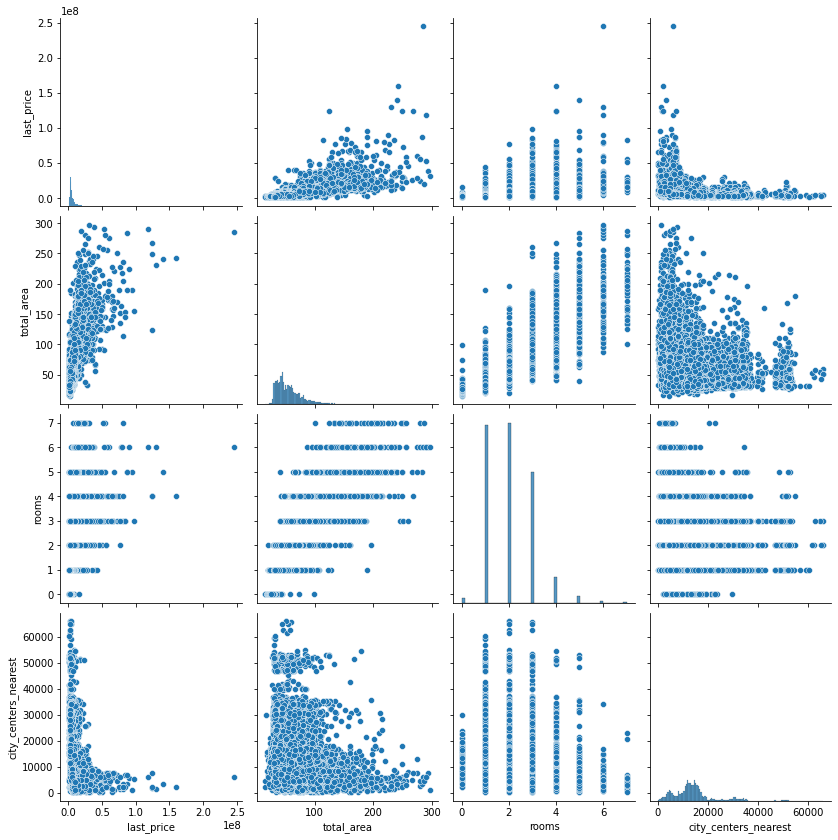

In [160]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


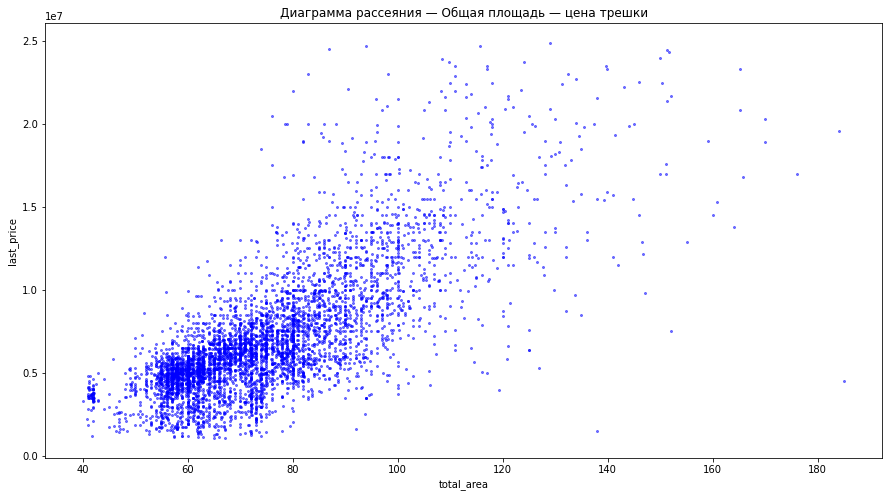

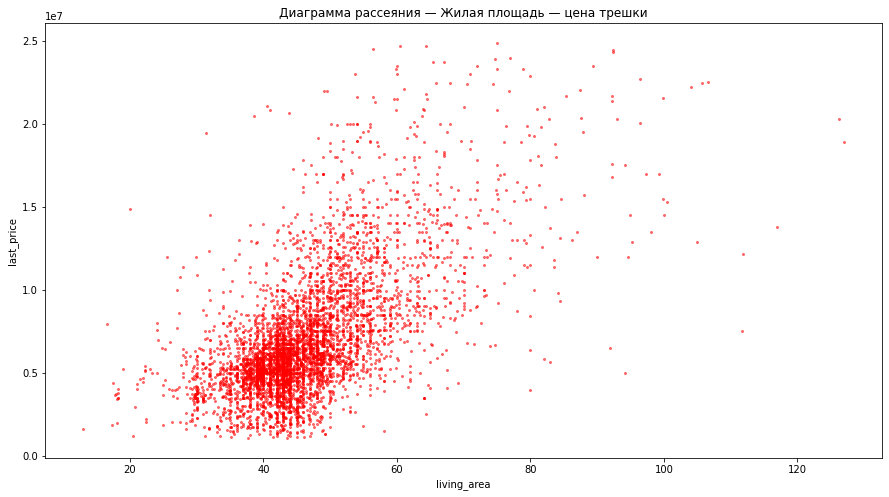

In [161]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

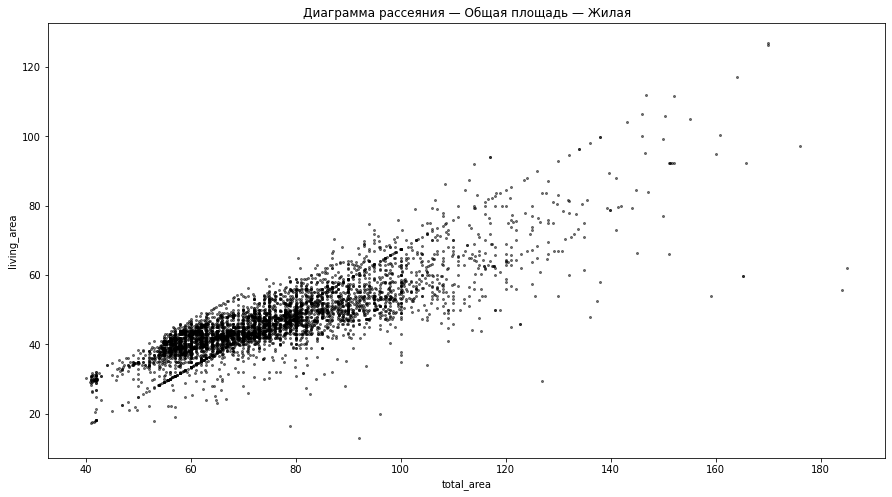

In [162]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');